In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
import arviz as az 
from RandomLoop import StateSpace, check_connectivity



In [13]:
plt.style.use('default')
plt.style.use('seaborn-v0_8-muted')

# Convergence and Equilibrium

In [73]:
m = StateSpace(3, 64, 2) 

obs = {
    'mean_links' : m.mean_links, 
    'mean_loop_length' : m.mean_loop_length, 
    'connectivity' : lambda: connectivity(m.grid, 8, 64)
    }


def connectivity(grid, d, grid_size):
    # get M random pairs at ditance d
    x_vertices = [tuple(np.random.randint(1, grid_size + 1, 2)) for _ in range(1000)]
    y_vertices = []
    for x in x_vertices:
        if x[0] + d >= grid_size:
            y_vertices.append(  (x[0] - d, x[1]) )
        else:
            y_vertices.append(  (x[0] + d, x[1]) )
    tot = 0
    for i in range(1000):
        tot += check_connectivity(m.grid, 0, x_vertices[i], y_vertices[i])
        
    return tot / 1000

m.step(4_000_000, 10_000, observables=obs)

  0%|          | 0/4000000 [00:00<?, ?it/s]

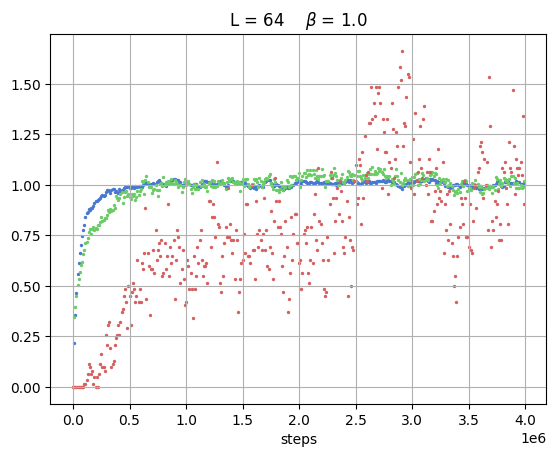

In [75]:
step = range(0, 4_000_000, 10_000)

ob1 = np.mean(m.data['mean_links'], axis=1)
ob1_avg = np.mean(m.data['mean_links'][-50:])

ob2 = np.array(m.data['mean_loop_length'])
ob2_avg = np.mean(m.data['mean_loop_length'][-50:])

ob3 = np.array(m.data['connectivity'])
ob3_avg = np.mean(m.data['connectivity'][-50:])

plt.scatter(step, ob1 / ob1_avg, s=2)
plt.scatter(step, ob2 / ob2_avg, s=2)
plt.scatter(step, ob3 / ob3_avg, s=2)
plt.title(r'L = 64    $\beta$ = 1.0')
plt.xlabel('steps')
plt.grid()

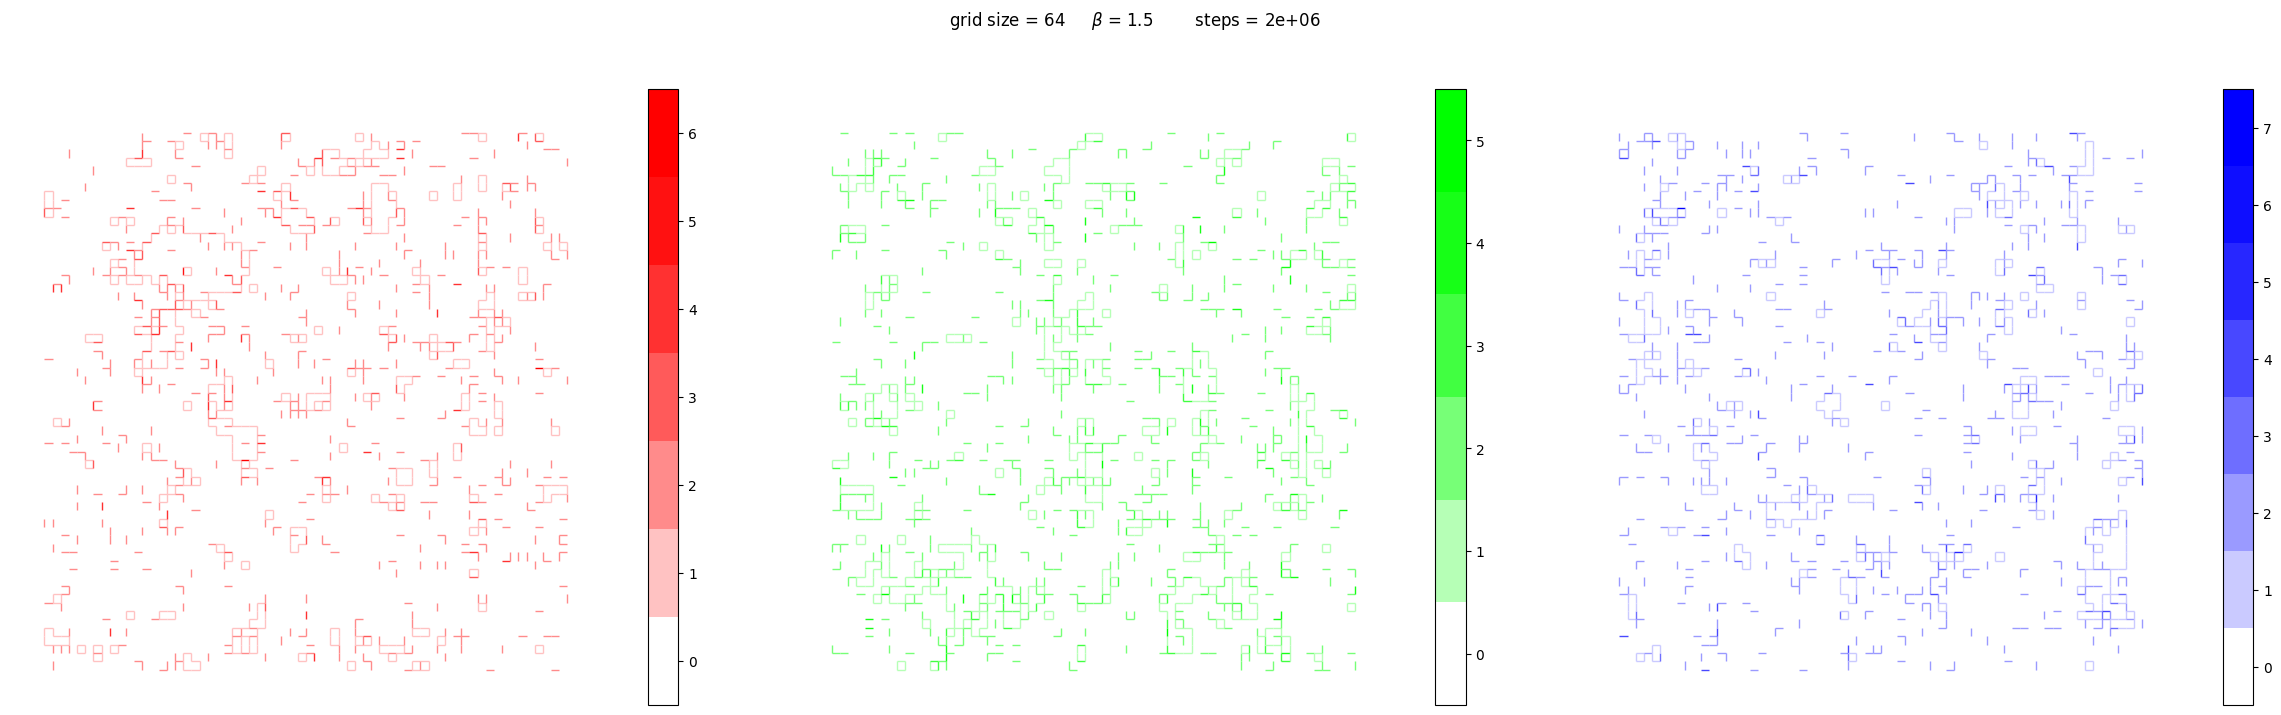

In [68]:
m.plot_grid()

In [72]:
ob3

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.002, 0.001, 0.   , 0.   , 0.004, 0.   , 0.   ,
       0.001, 0.003, 0.003, 0.001, 0.007, 0.001, 0.003, 0.   , 0.003,
       0.007, 0.006, 0.005, 0.008, 0.014, 0.011, 0.008, 0.009, 0.013,
       0.025, 0.019, 0.027, 0.013, 0.018, 0.03 , 0.027, 0.021, 0.022,
       0.014, 0.028, 0.03 , 0.017, 0.03 , 0.025, 0.034, 0.029, 0.021,
       0.035, 0.031, 0.032, 0.033, 0.034, 0.03 , 0.039, 0.024, 0.029,
       0.035, 0.035, 0.039, 0.034, 0.035, 0.025, 0.03 , 0.027, 0.025,
       0.034, 0.018, 0.016, 0.022, 0.04 , 0.03 , 0.039, 0.018, 0.027,
       0.022, 0.022, 0.021, 0.028, 0.019, 0.022, 0.011, 0.022, 0.023,
       0.02 , 0.022, 0.02 , 0.015, 0.018, 0.027, 0.02 , 0.025, 0.024,
       0.028, 0.022, 0.017, 0.028, 0.026, 0.028, 0.022, 0.028, 0.023,
       0.029, 0.018, 0.029, 0.023, 0.02 , 0.025, 0.028, 0.013, 0.019,
       0.023, 0.015, 0.019, 0.024, 0.016, 0.014, 0.015, 0.015, 0.014,
       0.017, 0.027,